## Load workspace

In [1]:
#save.image(file = "DESeq2_notebook.RData")
load("DESeq2_trimmed_macrogen_data_alone.RData")

## Load libraries

In [13]:
suppressPackageStartupMessages({library(Rsubread)
                                library(DESeq2)
                                library("dplyr")
                                library("ggplot2")
                                library("pheatmap")
                                library("RColorBrewer")
                                library(AnnotationDbi)
                                library(org.Dr.eg.db)
                                library(repr)
                                library(topGO)
                                library(GOstats)
                               })

library(GOstats)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



In [33]:
# set size of plot windows
options(repr.plot.width=12, repr.plot.height=10)

Did not remove duplicated reads although there are UMIs general advice from Anika is that these haven't been useful in bulk as they saturate quickly. #may check eventually if this is the case here when we have low read recover.
Reads were mapped to danrer11 with STAR.
Here following the RNA-seq workflow from bioconductor: https://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html

## Rsubread
First create count matrix with Rsubread: https://bioconductor.org/packages/3.12/bioc/vignettes/Rsubread/inst/doc/Rsubread.pdf

ThefeatureCountsfunction  is  a  general-purpose  read  summarization  function  thatassigns mapped reads (RNA-seq or gDNA-seq reads) to genomic features such as genes,exons, promoters, gene bodies and genomic windows.This function takes as input a set of files that contain read mapping results and anannotation file that includes genomic features.  It automatically detects the format ofinput read files (supported formats include SAM and BAM). Input reads can be name-sorted or location-sorted.  Users do not need to resort the reads before feeding them to featureCounts.

In [12]:
#?list.files
bamfiles<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed", pattern= "*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles2<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "Blebb[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles3<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "DMSO[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles4<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "cm[^/]*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles4

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm1/Blebbicm1.Aligned.out.bam"    
 [2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm2/Blebbicm2.Aligned.out.bam"    
 [3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm3/Blebbicm3.Aligned.out.bam"    
 [4] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam"
 [5] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam"
 [6] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam"
 [7] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam"    
 [8] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam"    
 [9] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam"    
[10] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm1/DMSOcm1.Aligned.out.bam"        
[11] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm2/DMSOcm2.Aligned.out.bam"        
[12] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm3/DMSOcm3.Aligned.out.bam"

In [5]:
#bamfiles
#bamfiles2
bamfiles_all<-c(bamfiles4)
bamfiles_all

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm1/Blebbicm1.Aligned.out.bam"    
 [2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm2/Blebbicm2.Aligned.out.bam"    
 [3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm3/Blebbicm3.Aligned.out.bam"    
 [4] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam"
 [5] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam"
 [6] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam"
 [7] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf1/cmV30hpf1.Aligned.out.bam"    
 [8] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf2/cmV30hpf2.Aligned.out.bam"    
 [9] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmV30hpf3/cmV30hpf3.Aligned.out.bam"    
[10] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm1/DMSOcm1.Aligned.out.bam"        
[11] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm2/DMSOcm2.Aligned.out.bam"        
[12] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm3/DMSOcm3.Aligned.out.bam"

In [6]:
mycounts <- featureCounts(bamfiles_all, annot.ext="/fast/AG_Ohler/Alison/reference_genomes/danrer11/Danio_rerio.GRCz11.100.gtf", isGTFAnnotationFile=TRUE, isPairedEnd=FALSE, countMultiMappingReads = FALSE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.3.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 12 BAM files                                     ||
||                           o Blebbicm1.Aligned.out.bam                      ||
||                           o Blebbicm2.Aligned.out.bam                      ||
||                           o Blebbicm3.Aligned.out.bam                      ||
||                           o cmCTL30hpf1.Aligned.ou

In [7]:
#summary(mycounts)
#dim(mycounts$counts)
#head(mycounts$annotation)
#mycounts$targets
#mycounts$stat

## Import count matrix into DESeq2
Now import count matrix into DESeq2 with DESeqDataSetFromMatrix (see 3.2 Starting from count matrices)
Batches were given by Anne Merks. Could be divided based on embryonic clutches but this is unbalanced for the second expt because different embryonic lines were used, and also when the experiment was performed.
Experiment batches won't be used for selection of DE genes so can't be included in design formula. Decide whether it is better to analyse them separately or all together (first inclination is together, to allow more borrowed information).

In [20]:
countData<-mycounts$counts
allsamples<-read.csv("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/mapped_trimmed_samplesheet_batches_macrogen.txt", sep="\t", header=TRUE)
allsamples[allsamples$expt=="expt1",]
colData<-allsamples[allsamples$expt=="expt1",]
colData

,path,samplename,condition,expt
,<chr>,<chr>,<chr>,<chr>
23,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm1/Blebbicm1.Aligned.out.bam,Blebbicm1,bleb,expt1
24,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm2/Blebbicm2.Aligned.out.bam,Blebbicm2,bleb,expt1
25,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm3/Blebbicm3.Aligned.out.bam,Blebbicm3,bleb,expt1
26,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm1/DMSOcm1.Aligned.out.bam,DMSOcm1,dmso,expt1
27,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm2/DMSOcm2.Aligned.out.bam,DMSOcm2,dmso,expt1
28,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm3/DMSOcm3.Aligned.out.bam,DMSOcm3,dmso,expt1
29,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf1,wt,expt1
30,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf2,wt,expt1
31,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam,cmCTL30hpf3,wt,expt1


,path,samplename,condition,expt
,<chr>,<chr>,<chr>,<chr>
23,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm1/Blebbicm1.Aligned.out.bam,Blebbicm1,bleb,expt1
24,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm2/Blebbicm2.Aligned.out.bam,Blebbicm2,bleb,expt1
25,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/Blebbicm3/Blebbicm3.Aligned.out.bam,Blebbicm3,bleb,expt1
26,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm1/DMSOcm1.Aligned.out.bam,DMSOcm1,dmso,expt1
27,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm2/DMSOcm2.Aligned.out.bam,DMSOcm2,dmso,expt1
28,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/DMSOcm3/DMSOcm3.Aligned.out.bam,DMSOcm3,dmso,expt1
29,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf1/cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf1,wt,expt1
30,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf2/cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf2,wt,expt1
31,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/cmCTL30hpf3/cmCTL30hpf3.Aligned.out.bam,cmCTL30hpf3,wt,expt1


In [21]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                                 colData = colData,
                                 design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Exploratory analysis and visualization

### Prefiltering the dataset
Removing rows with no counts or only a single count across all samples.
NB may come back and adjust this

In [22]:
nrow(dds)

[1] 32520

In [23]:
keep <- rowSums(counts(dds)) > 1
# at least 3 samples with a count of 10 or higher
#keep <- rowSums(counts(dds) >= 1) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 29986

### select samples with significant counts
Without any filtering of samples with low counts - samples 2, 5, 23, 3, 9, 14, 21, 22 cluster separately.

In [24]:
colSums(counts(dds))

Blebbicm1.Aligned.out.bam   Blebbicm2.Aligned.out.bam 
                   36234377                    42512862 
  Blebbicm3.Aligned.out.bam cmCTL30hpf1.Aligned.out.bam 
                   44184576                    29142506 
cmCTL30hpf2.Aligned.out.bam cmCTL30hpf3.Aligned.out.bam 
                   30780377                    28326027 
  cmV30hpf1.Aligned.out.bam   cmV30hpf2.Aligned.out.bam 
                   28790460                    32913832 
  cmV30hpf3.Aligned.out.bam     DMSOcm1.Aligned.out.bam 
                   33435715                    43499366 
    DMSOcm2.Aligned.out.bam     DMSOcm3.Aligned.out.bam 
                   50266513                    44260088

In [25]:
colSums(counts(dds[,colSums(counts(dds)) < 150000]))

numeric(0)

Hangover filtering steps from the lower depth samples. All this samples have very high depth.

In [26]:
keep2 <- colSums(counts(dds)) > 150000
dds <- dds[,keep2]
ncol(dds)

[1] 12

##  The variance stabilizing transformation and the rlog

Normalization here is aimed to stabilise the variance across the mean, for the purposes of plotting. If you just take counts, the largest counts have the highest absolute variance. If you take log2+1 of counts, the smaller counts will be over-represented in the variance.
DESeq2 has two methods to deal with this now - VST and rlog.
The rlog tends to work well on small datasets (n < 30), potentially outperforming the VST when there is a wide range of sequencing depth across samples (an order of magnitude difference).
=> Use rlog here, but it takes longer to compute

In [27]:
vsd <- vst(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(vsd), 3)

,Blebbicm1.Aligned.out.bam,Blebbicm2.Aligned.out.bam,Blebbicm3.Aligned.out.bam,cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf3.Aligned.out.bam,cmV30hpf1.Aligned.out.bam,cmV30hpf2.Aligned.out.bam,cmV30hpf3.Aligned.out.bam,DMSOcm1.Aligned.out.bam,DMSOcm2.Aligned.out.bam,DMSOcm3.Aligned.out.bam
ENSDARG00000102141,8.164903,8.505115,8.799544,8.424067,8.473073,8.561160,8.190652,8.434376,8.099152,8.480609,8.532114,8.750299
ENSDARG00000102123,7.775133,7.651263,7.950361,7.528543,6.999328,7.186588,7.340066,6.946005,7.284272,7.524541,7.384037,7.360529
ENSDARG00000114503,8.701045,7.970507,9.025063,8.540348,7.674595,8.118976,7.570850,7.854079,7.214121,8.183082,8.338949,8.317528


In [28]:
rld <- rlog(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(rld), 3)

,Blebbicm1.Aligned.out.bam,Blebbicm2.Aligned.out.bam,Blebbicm3.Aligned.out.bam,cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf3.Aligned.out.bam,cmV30hpf1.Aligned.out.bam,cmV30hpf2.Aligned.out.bam,cmV30hpf3.Aligned.out.bam,DMSOcm1.Aligned.out.bam,DMSOcm2.Aligned.out.bam,DMSOcm3.Aligned.out.bam
ENSDARG00000102141,7.790865,8.113063,8.385865,8.036948,8.082934,8.165110,7.815504,8.046645,7.727284,8.090190,8.138642,8.341019
ENSDARG00000102123,6.912668,6.790893,7.088440,6.664720,6.104818,6.306792,6.469305,6.046145,6.410558,6.662367,6.514755,6.489955
ENSDARG00000114503,8.170462,7.472743,8.469372,8.021477,7.175933,7.619144,7.069752,7.357449,6.692981,7.681957,7.832861,7.811827


Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


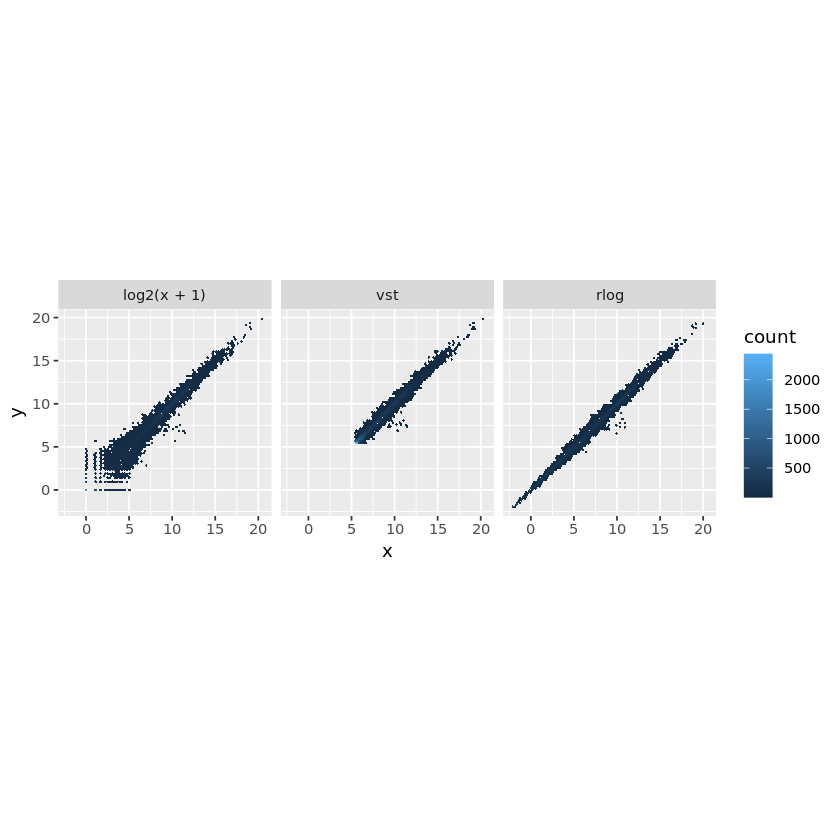

In [29]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

In [30]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists

In [31]:
library("pheatmap")
library("RColorBrewer")

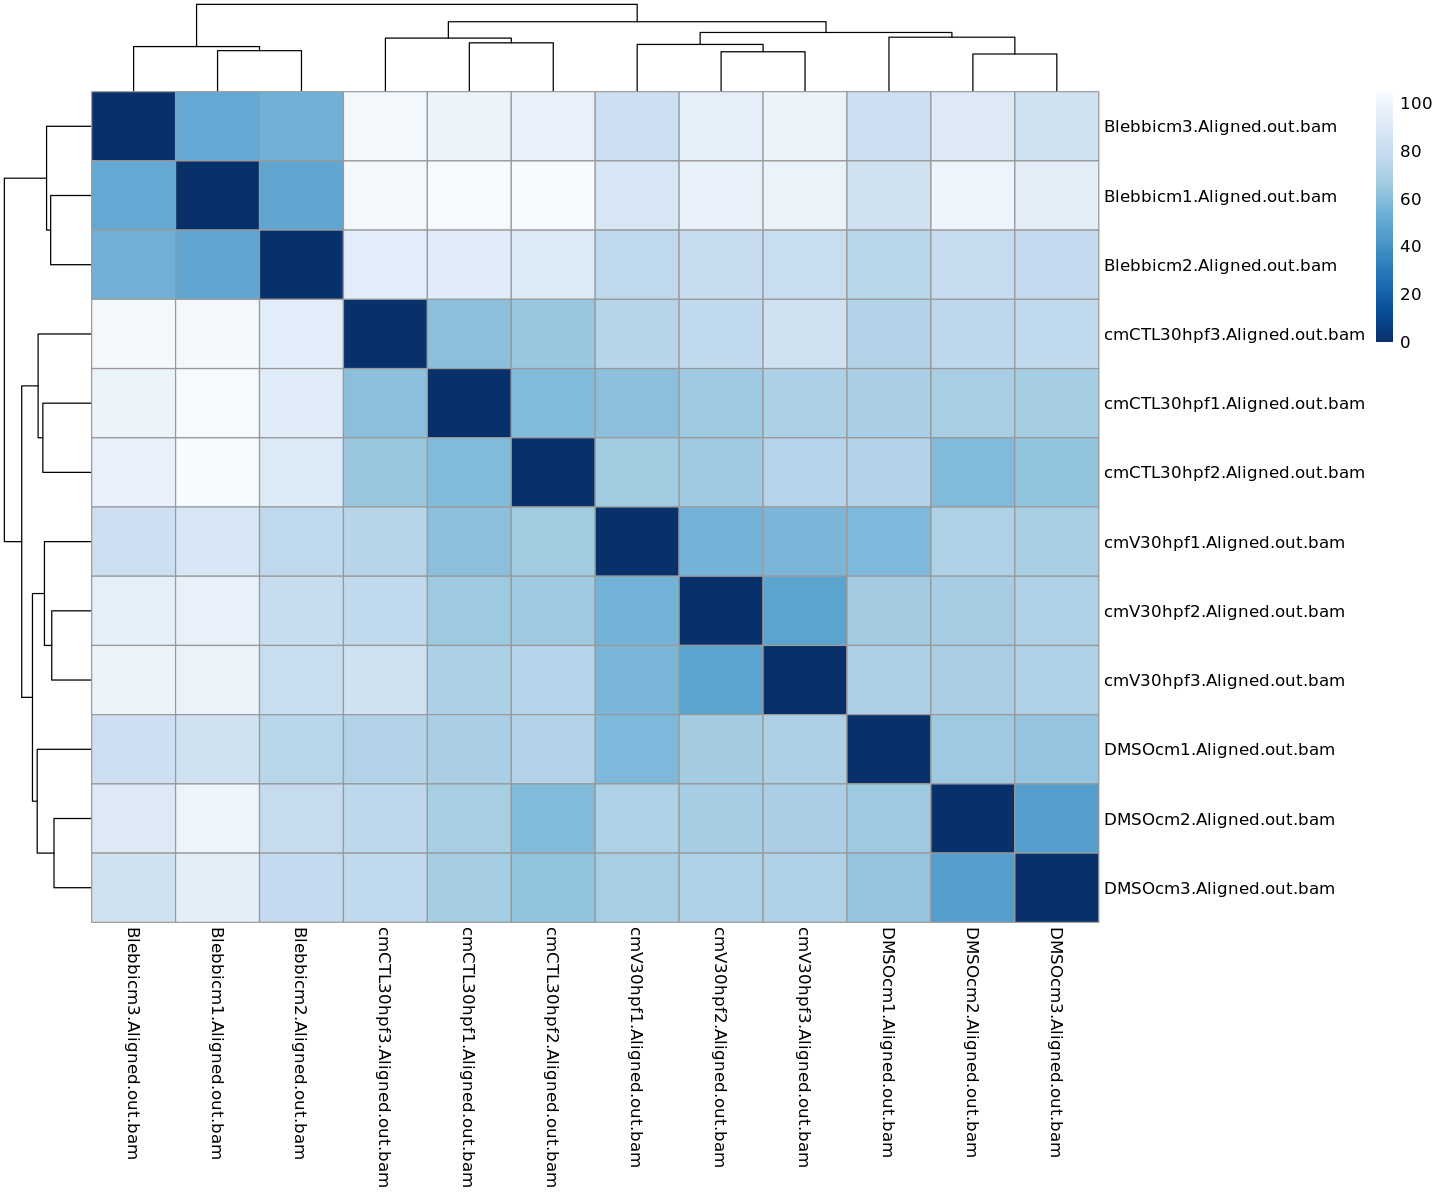

In [34]:
sampleDistMatrix <- as.matrix( sampleDists )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

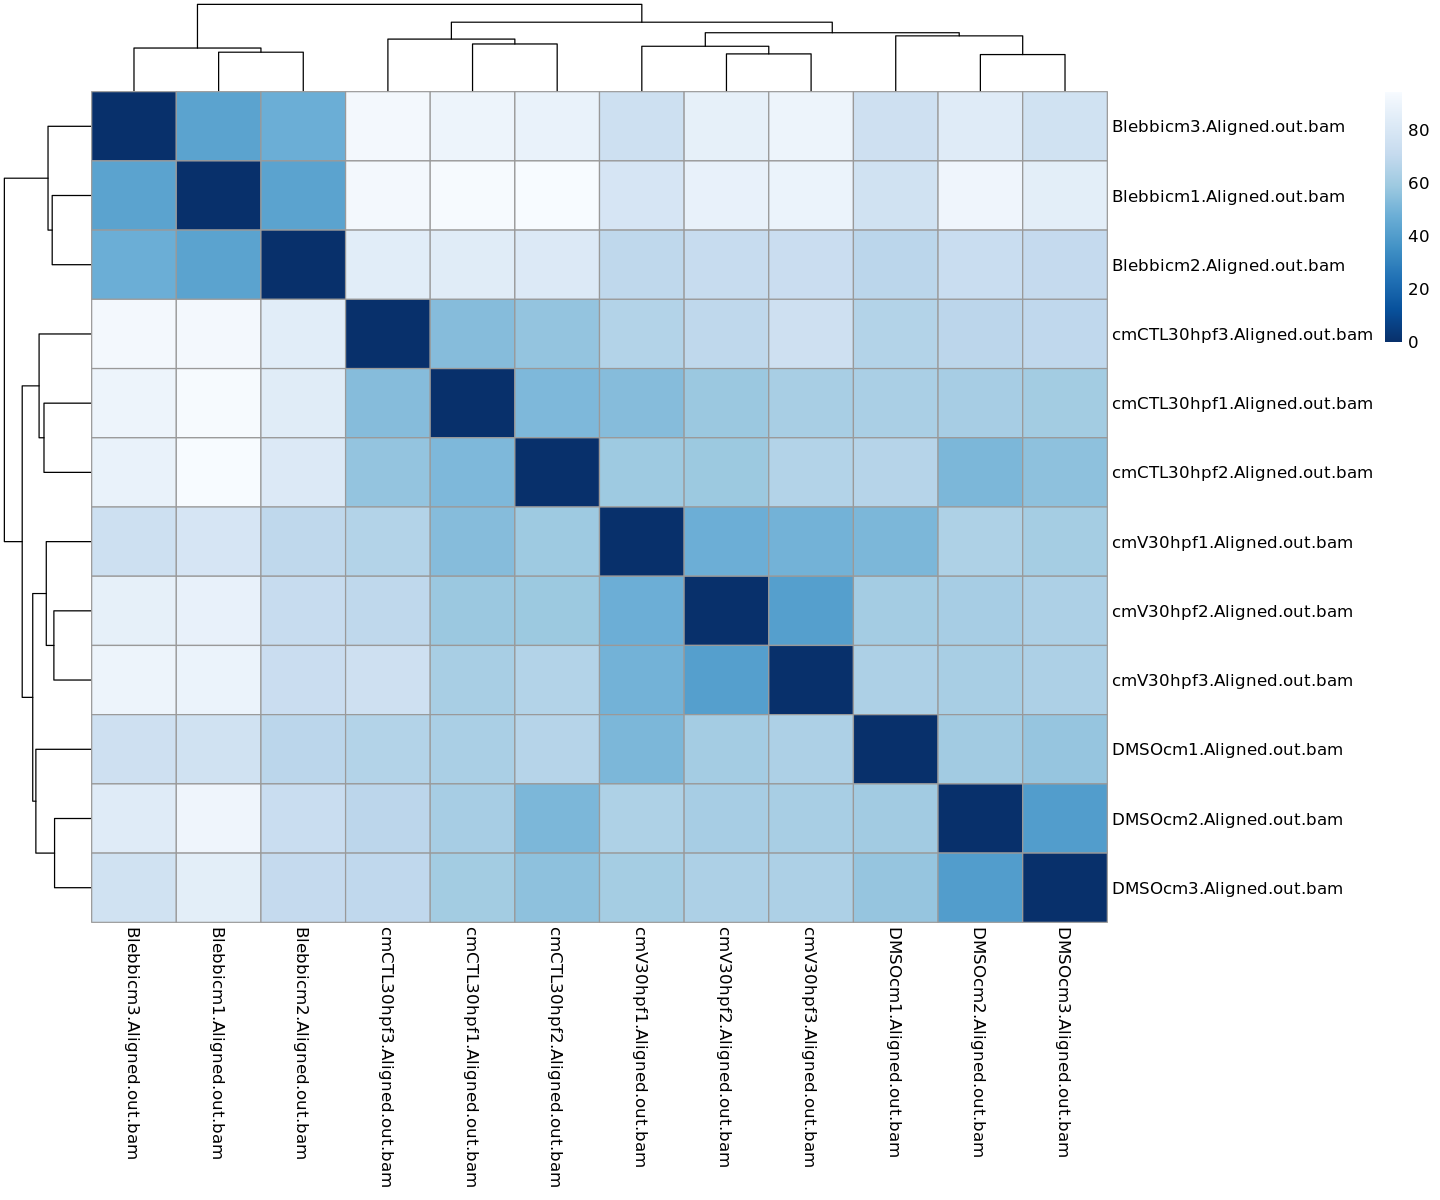

In [35]:
sampleDists_rld <- dist(t(assay(rld)))
sampleDistMatrix_rld <- as.matrix( sampleDists_rld )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix_rld,
         clustering_distance_rows = sampleDists_rld,
         clustering_distance_cols = sampleDists_rld,
         col = colors)

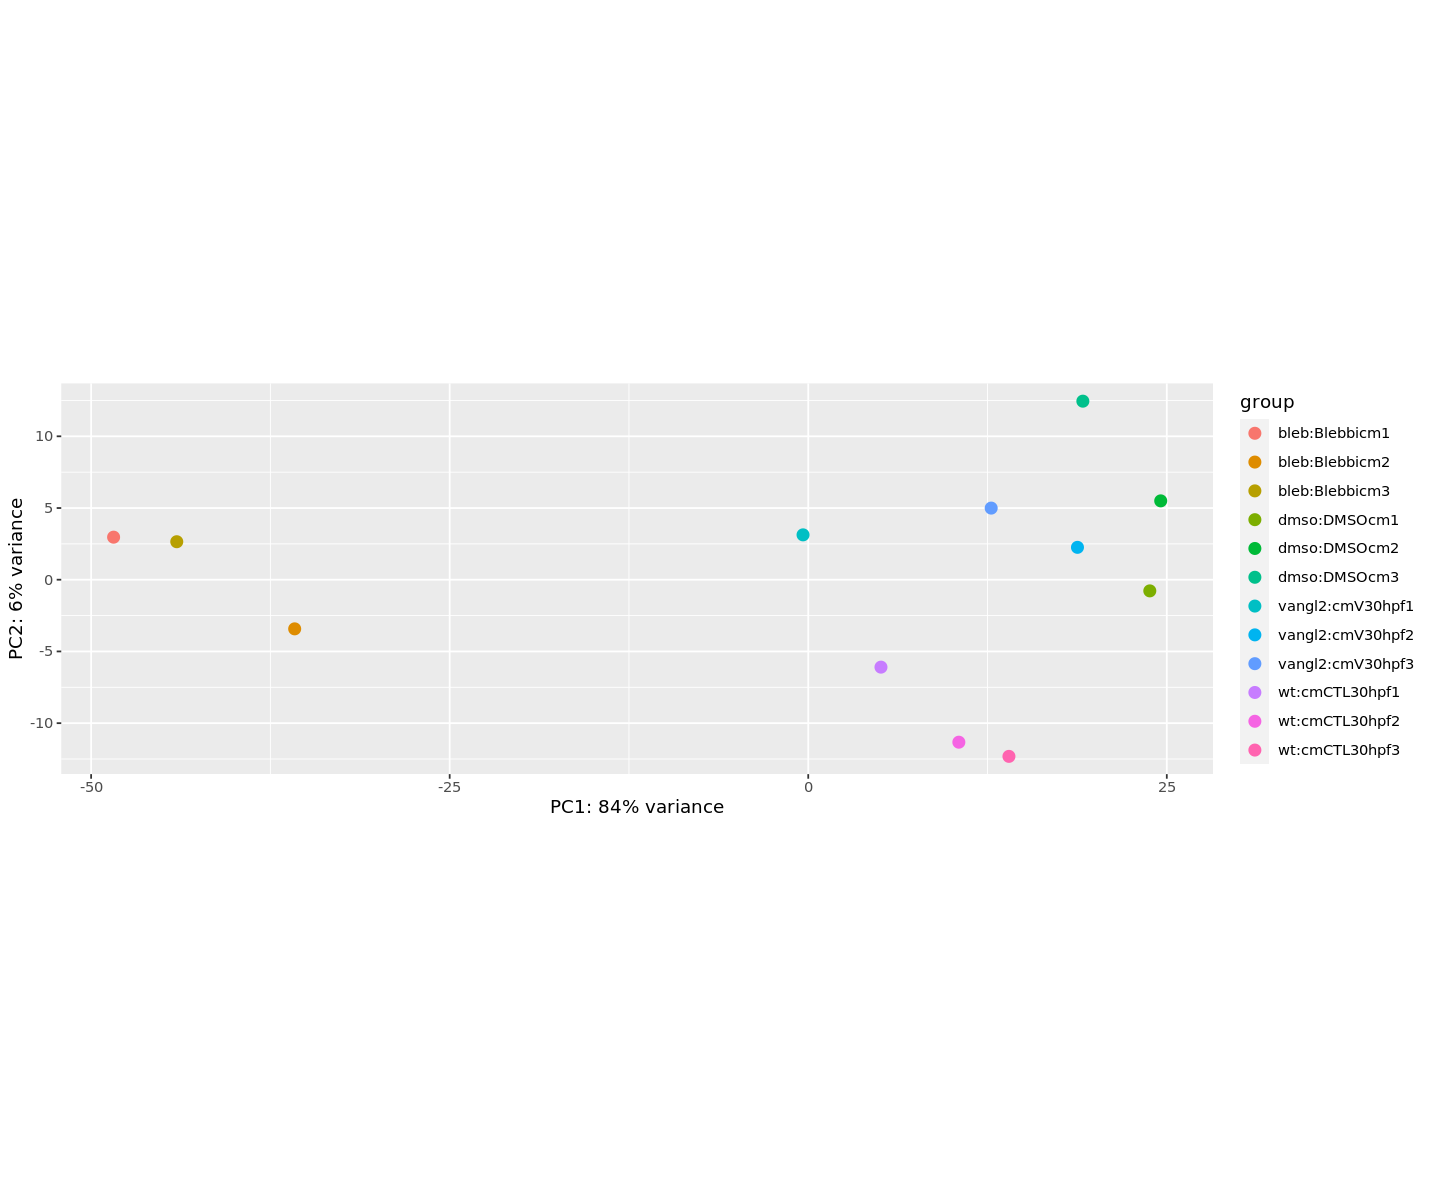

In [36]:
plotPCA(vsd, intgroup=c("condition","samplename"))
# add sample names

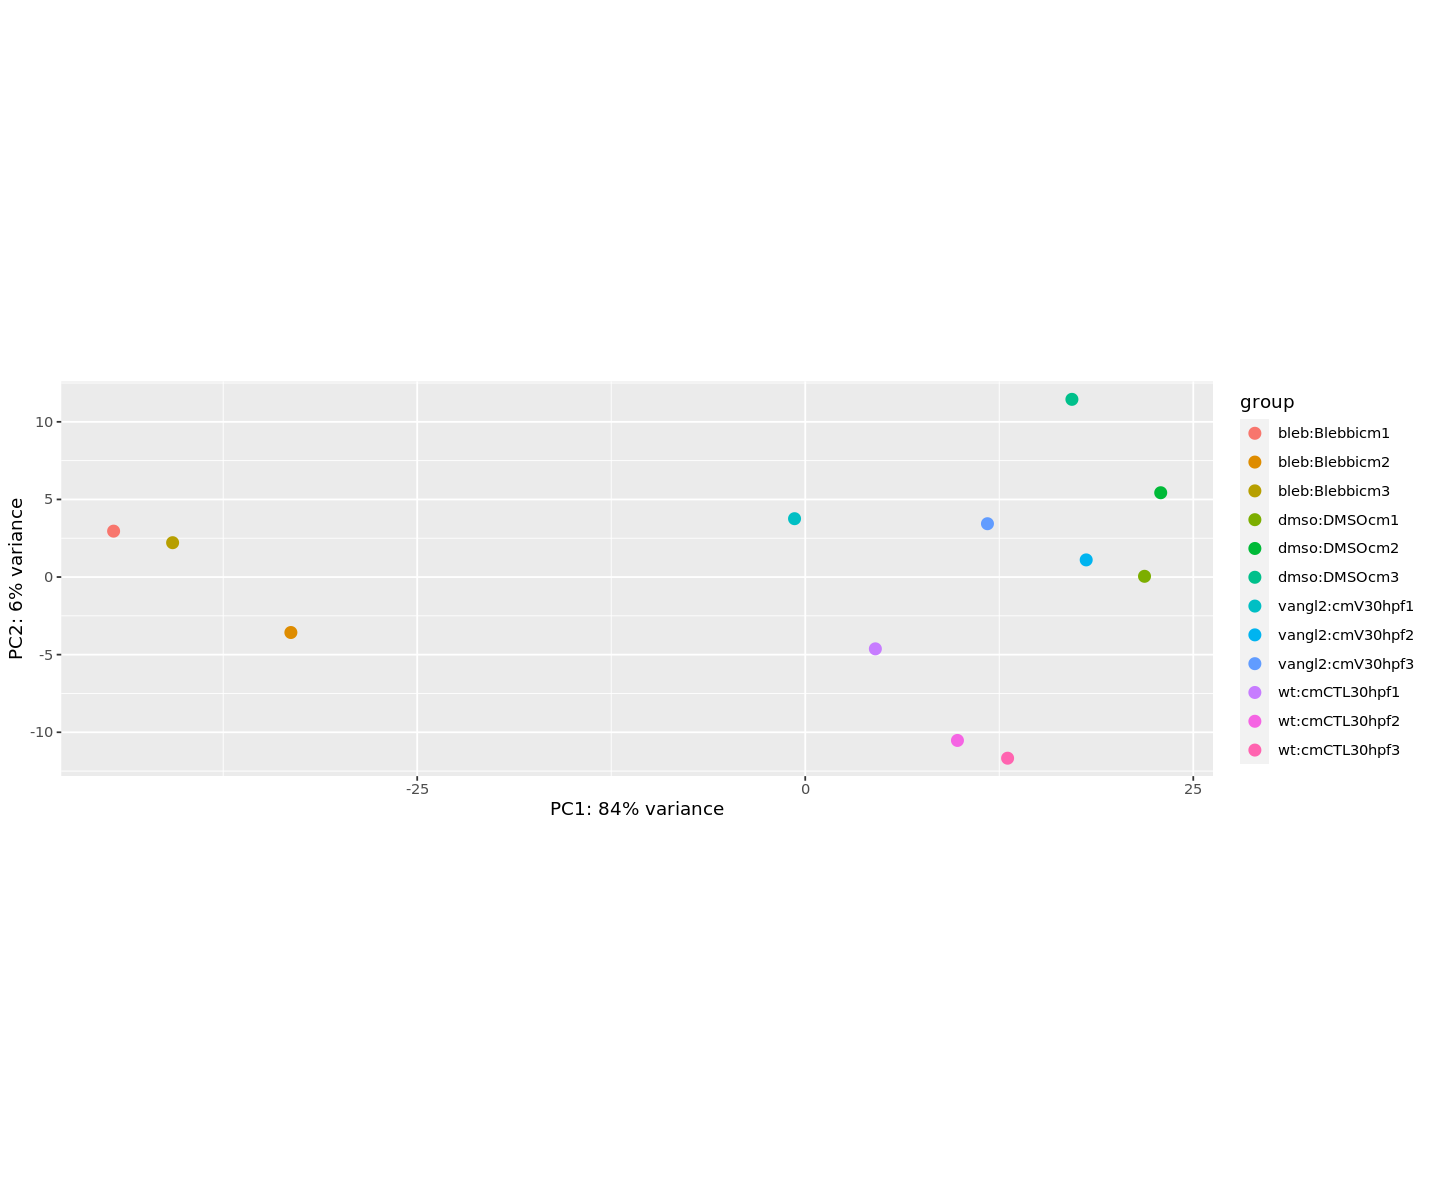

In [37]:
plotPCA(rld, intgroup=c("condition","samplename"))

## Differential expression analysis
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.

In [38]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [39]:
res <- results(dds, contrast=c("condition","bleb","dmso"))
res

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 29986 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat     pvalue
                   <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSDARG00000102141  271.0352      0.0367042  0.226450  0.162086 0.87123836
ENSDARG00000102123   97.0282      0.8822813  0.296297  2.977692 0.00290428
ENSDARG00000114503  214.7252      0.6185595  0.362701  1.705423 0.08811552
ENSDARG00000115971   16.6762     -0.3519133  0.559765 -0.628680 0.52955867
ENSDARG00000098311  207.5372     -0.2048422  0.258766 -0.791613 0.42858622
...                      ...            ...       ...       ...        ...
ENSDARG00000101464   3.00624       0.326394  1.229400  0.265491   0.790632
ENSDARG00000103580 210.89215      -0.141194  0.260591 -0.541822   0.587941
ENSDARG00000104659 462.04324       0.115148  0.152091  0.757098   0.448991
ENSDARG00000101098  59.57745       0.396836 

### select significant genes between bleb and dmso
If I don't remove samples with low counts I only get 129 diff genes

In [40]:
sum(res$padj < 0.05, na.rm=TRUE)
resSig <- subset(res, padj < 0.05)
resSig <- subset(resSig, abs(log2FoldChange) > 1)
dim(resSig)
sum(resSig$log2FoldChange > 1, na.rm=TRUE)
sum(resSig$log2FoldChange < -1, na.rm=TRUE)

[1] 3502

[1] 1656    6

[1] 1261

[1] 395

781 (30%) of these genes are shared with the macrogen analysis.

In [41]:
head(resSig[ order(-resSig$log2FoldChange), ])

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000029710 123.14055        6.83619  0.636221  10.74500 6.25593e-27
ENSDARG00000117641  31.18474        6.58160  1.072139   6.13876 8.31680e-10
ENSDARG00000022817 432.88686        6.57552  0.698639   9.41190 4.87245e-21
ENSDARG00000101217  43.84760        6.30525  0.789964   7.98168 1.44349e-15
ENSDARG00000110179  48.68930        6.23536  0.786911   7.92384 2.30280e-15
ENSDARG00000112703   4.40838        6.16662  1.510417   4.08273 4.45096e-05
                          padj
                     <numeric>
ENSDARG00000029710 9.96763e-25
ENSDARG00000117641 2.91843e-08
ENSDARG00000022817 4.97391e-19
ENSDARG00000101217 9.17493e-14
ENSDARG00000110179 1.44038e-13
ENSDARG00000112703 6.94627e-04

annotate genes with gene names

In [42]:
library(AnnotationDbi)
library(org.Dr.eg.db)

In [43]:
columns(org.Dr.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "ONTOLOGY"     "ONTOLOGYALL" 
[16] "PATH"         "PFAM"         "PMID"         "PROSITE"      "REFSEQ"      
[21] "SYMBOL"       "UNIGENE"      "UNIPROT"      "ZFIN"

In [44]:
#ens.str <- substr(rownames(res), 1)
ens.str <- substr(rownames(res), 1, length(rownames(res)))
res$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [45]:
#ens.str <- substr(rownames(res), 1, length(rownames(res)))
resSig <- subset(res, padj < 0.05)
resSig <- subset(resSig, abs(log2FoldChange) > 1)

### plot heat maps with top and bottom DE genes

In [46]:
#select top and bottom most differential genes
topBotDEGenes<-rbind(head(resSig[ order(-resSig$log2FoldChange), ], 20),
                       head(resSig[ order(resSig$log2FoldChange), ], 20))
#head(topBotDEGenes, 20)

In [47]:
# select blab and dmso samples
blebdmso_samples<-colData(vsd)[vsd$condition == "bleb" | vsd$condition == "dmso",]

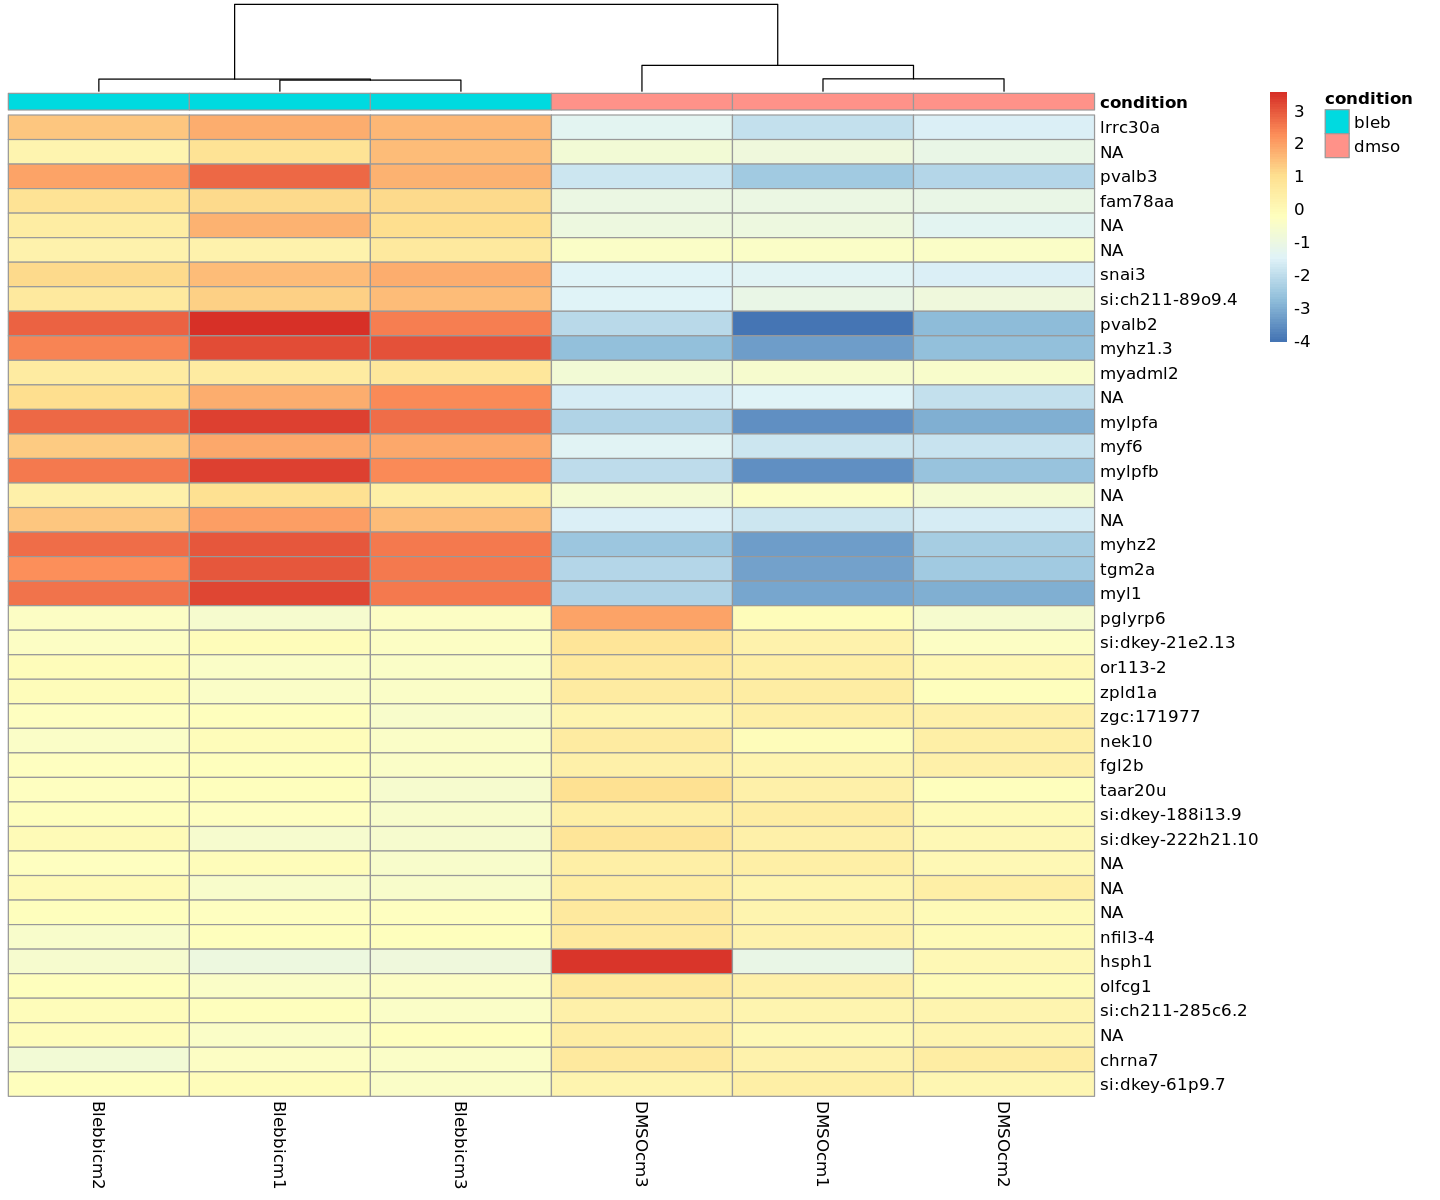

In [48]:
mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(blebdmso_samples)])
mat  <- mat - rowMeans(mat)
anno <- as.data.frame(colData(vsd)[rownames(blebdmso_samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
library(pheatmap)
labels_col = c(colData(vsd)[rownames(blebdmso_samples), "samplename"])
labels_row = c(topBotDEGenes$symbol)
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
#pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_macrogentogether_outputs/topbot15heatmap_bleb_dmso.png")
#pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_macrogentogether_outputs/topbot15heatmap_bleb_dmso.pdf")

In [49]:
rawcounts<-assays(dds)$counts
head(rawcounts)
##looking up vangl2
rawcounts[rownames(rawcounts) == "ENSDARG00000027397", ]

,Blebbicm1.Aligned.out.bam,Blebbicm2.Aligned.out.bam,Blebbicm3.Aligned.out.bam,cmCTL30hpf1.Aligned.out.bam,cmCTL30hpf2.Aligned.out.bam,cmCTL30hpf3.Aligned.out.bam,cmV30hpf1.Aligned.out.bam,cmV30hpf2.Aligned.out.bam,cmV30hpf3.Aligned.out.bam,DMSOcm1.Aligned.out.bam,DMSOcm2.Aligned.out.bam,DMSOcm3.Aligned.out.bam
ENSDARG00000102141,178,293,392,239,243,262,184,238,171,353,384,410
ENSDARG00000102123,121,128,181,98,49,63,75,46,71,137,121,104
ENSDARG00000114503,288,178,473,265,112,175,98,137,65,269,323,280
ENSDARG00000115971,7,21,9,8,17,17,21,21,17,17,20,26
ENSDARG00000098311,126,167,240,235,190,123,258,268,222,185,228,234
ENSDARG00000104839,22,20,27,30,34,46,23,43,13,69,37,12


Blebbicm1.Aligned.out.bam   Blebbicm2.Aligned.out.bam 
                       2373                        2881 
  Blebbicm3.Aligned.out.bam cmCTL30hpf1.Aligned.out.bam 
                       3859                        4123 
cmCTL30hpf2.Aligned.out.bam cmCTL30hpf3.Aligned.out.bam 
                       4193                        2994 
  cmV30hpf1.Aligned.out.bam   cmV30hpf2.Aligned.out.bam 
                       2764                        2724 
  cmV30hpf3.Aligned.out.bam     DMSOcm1.Aligned.out.bam 
                       1871                        4817 
    DMSOcm2.Aligned.out.bam     DMSOcm3.Aligned.out.bam 
                       4837                        3353

#### Heatmap with all DE genes between samples

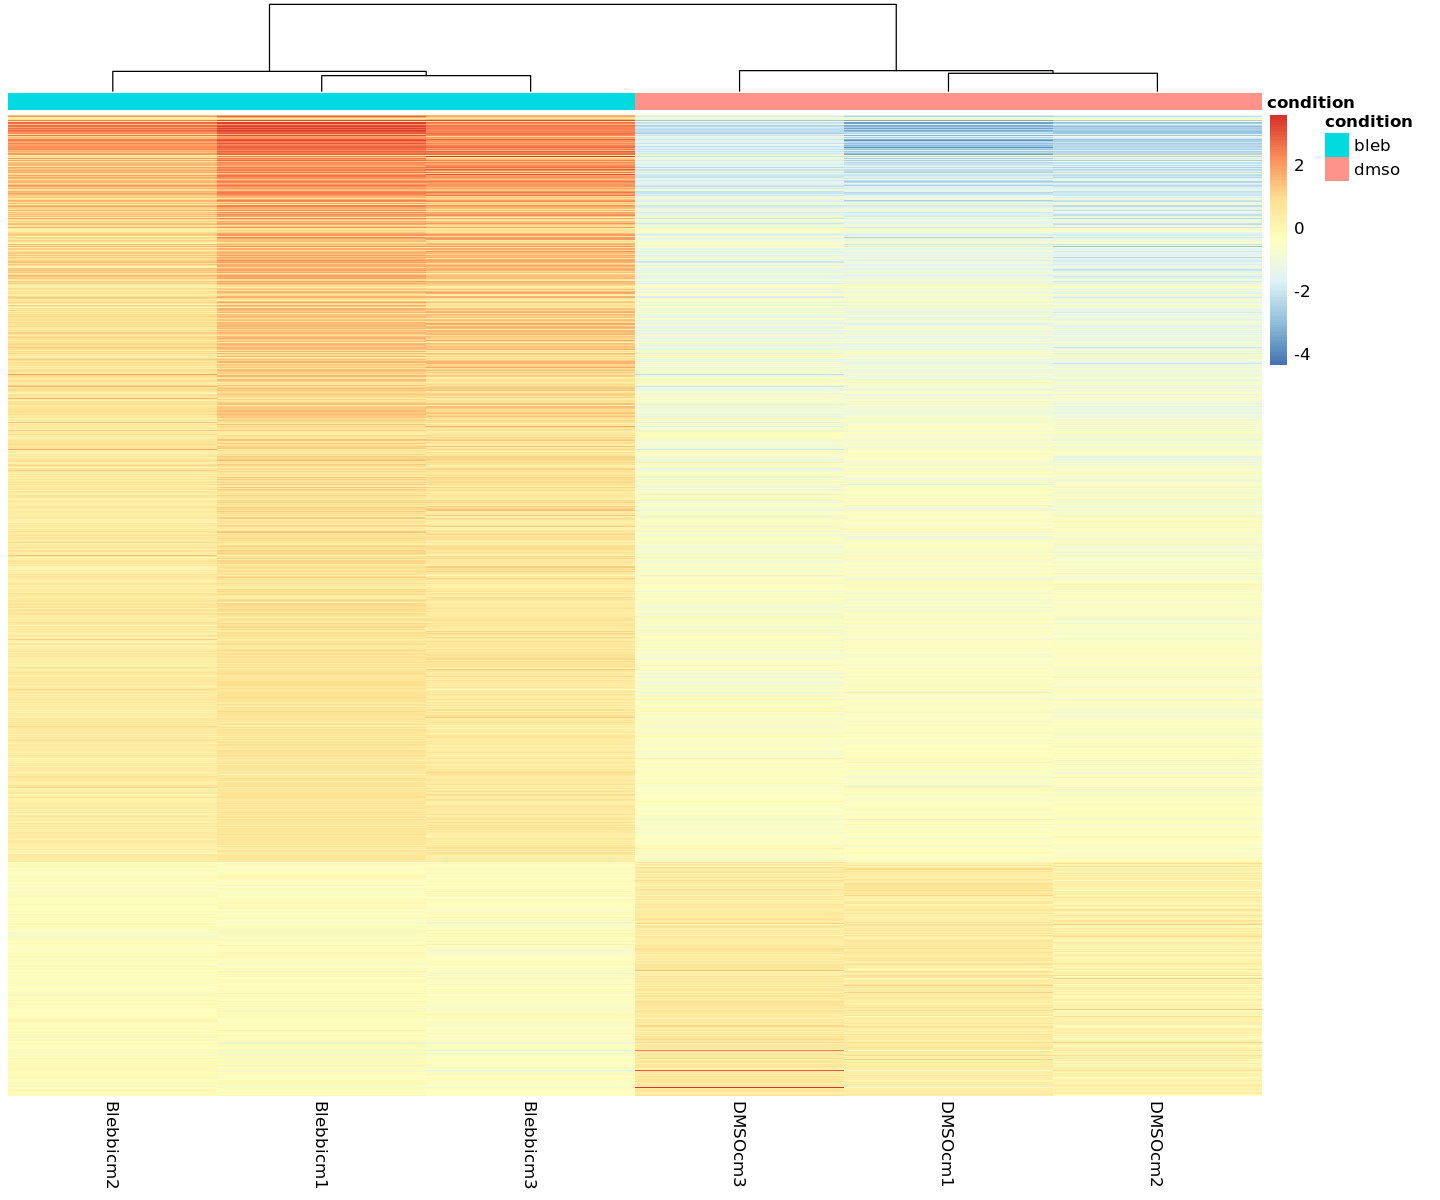

In [50]:
allDEGenes<-resSig[ order(-resSig$log2FoldChange), ]

matall<-(assay(vsd)[rownames(allDEGenes), rownames(blebdmso_samples)])
matall  <- matall - rowMeans(matall)
anno <- as.data.frame(colData(vsd)[rownames(blebdmso_samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
library(pheatmap)
labels_col = c(colData(vsd)[rownames(blebdmso_samples), "samplename"])
pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE)
#pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE, filename = "deseq2_macrogentogether_outputs/allDEpadj0.05heatmap_bleb_dmso.pdf")

## volcano plot

In [51]:
## NB the numbers don't add up with the signficant DE genes. try ovelaying them?

In [52]:
de<-data.frame(subset(res, padj != 0))
dim(de)
#p <- ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj))) + geom_point() + theme_minimal()
#p

[1] 23581     8

In [53]:
# Add vertical lines for log2FoldChange thresholds, and one horizontal line for the p-value threshold 
p2 <- p + geom_vline(xintercept=c(-1, 1), col="red") +
    geom_hline(yintercept=-log10(0.05), col="red")
#p2

In [54]:
# add a column of NAs
de$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de$diffexpressed[de$log2FoldChange < -1 & de$padj < 0.05] <- "DOWN"

# Re-plot but this time color the points with "diffexpressed"
p <- ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + geom_point() + theme_minimal()

# Add lines as before...
p2 <- p + geom_vline(xintercept=c(-1, 1), col="red") +
        geom_hline(yintercept=-log10(0.05), col="red")

In [55]:
length((de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05]))

[1] 1261

In [56]:
#de$symbol[de$symbol==NA]<-de$rowname[de$symbol==NA]
#de$symbol[is.na(de$symbol)] <- as.character(rownames(de)[is.na(de$symbol)])
##head(de)

In [1]:
## volcano plot
de<-data.frame(subset(res, padj != 0))
dim(de)
de$delabel <- NA
de$symbol <- as.factor(de$symbol)
# add a column of NAs
de$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de$diffexpressed[de$log2FoldChange < -1 & de$padj < 0.05] <- "DOWN"
#de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
#de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <-"UP"
de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <- as.character(de$symbol[de$log2FoldChange > 5 | -log10(de$padj) > 40])
de$delabel[(de$log2FoldChange < -4) | (de$log2FoldChange < -1 & -log10(de$padj) > 7)] <- as.character(de$symbol[(de$log2FoldChange < -4) | (de$log2FoldChange < -1 & -log10(de$padj) > 7)])
plot<-ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed, label=delabel)) + 
    geom_point() + 
    theme_minimal() +
    geom_text(nudge_x = 0.5) +
scale_color_manual(values=c("blue", "black", "red"))
plot2<-ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + 
    geom_point() + 
    theme_minimal()+
scale_color_manual(values=c("blue", "black", "red"))
#ggsave(filename = "deseq2_macrogenonly_outputs/volcanoallDEFC1padj0.05_blebb_dmso.pdf", plot=plot)
#ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot)
#ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_nolab_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot2)

ERROR: Error in subset(res, padj != 0): object 'res' not found


### Write out table with differentially expression genes 


In [26]:
resSigOrdered <- resSig[order(-resSig$log2FoldChange),]
resSigOrderedDF <- as.data.frame(resSigOrdered)
head(resSigOrderedDF)
write.csv(resSigOrderedDF, file = "deseq2_macrogenonly_outputs/resultsDElogFC1padj0.05_bleb_dmso.csv")
write.csv(resSigOrderedDF, file = "macrogen_and_celseq_analysis_200731/macrogen_resultsDElogFC1padj0.05_bleb_dmso.csv")
dim(resSigOrderedDF)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000029710,123.140549,6.836193,0.6362206,10.745004,6.255925e-27,9.967634e-25,lrrc30a,552944
ENSDARG00000117641,31.184744,6.581604,1.0721390,6.138760,8.316801e-10,2.918430e-08,NA,NA
ENSDARG00000022817,432.886859,6.575524,0.6986393,9.411901,4.872450e-21,4.973906e-19,pvalb3,100000771
ENSDARG00000101217,43.847601,6.305246,0.7899643,7.981685,1.443492e-15,9.174930e-14,fam78aa,559300
ENSDARG00000110179,48.689296,6.235360,0.7869111,7.923843,2.302804e-15,1.440382e-13,NA,NA
ENSDARG00000112703,4.408376,6.166624,1.5104166,4.082731,4.450960e-05,6.946267e-04,NA,NA


[1] 1656    8

## Volcano plot overlaying second experiment

In [27]:
res_expt2<-read.csv("deseq2_trimmed_outputs/resultsDElogFC1DEpadj0.05_bleb_dmso.csv", row.names=1)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



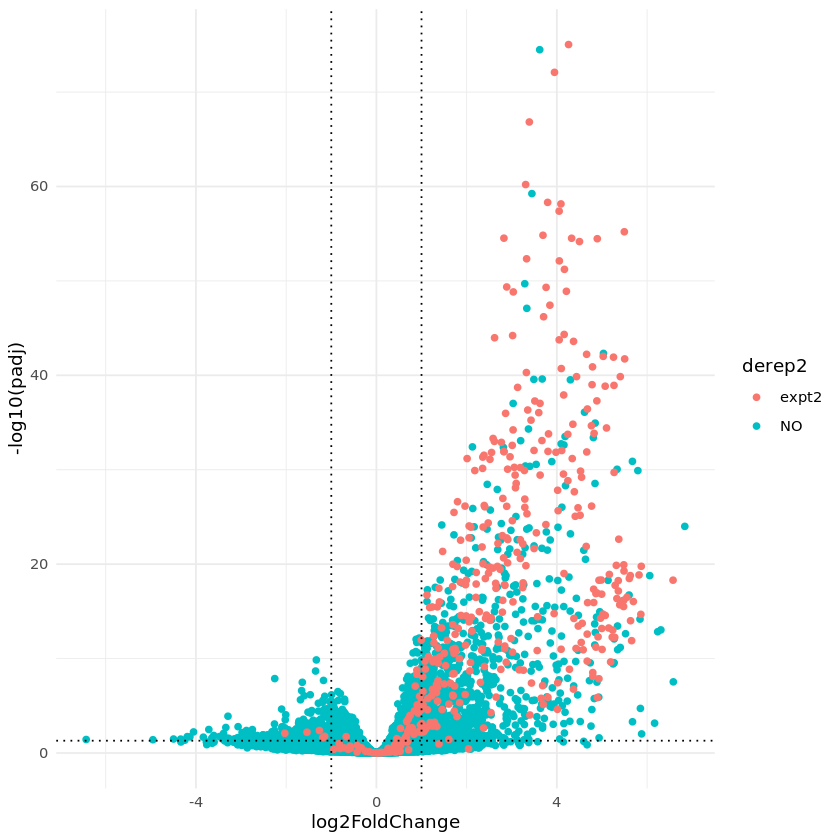

In [51]:
de$derep2 <- "NO"

de$derep2[rownames(de) %in% rownames(res_expt2)] <- "expt2"
de <- de[order(-as.numeric(factor(de$derep2))),]
plotoverlap<-ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=derep2)) + 
    geom_point() + 
    theme_minimal()+
    geom_vline(xintercept=c(-1, 1), col="black", linetype="dotted") +
    geom_hline(yintercept=-log10(0.05), col="black",linetype="dotted")
plotoverlap
ggsave(filename = "deseq2_macrogenonly_outputs/volcanoallDEFC1padj0.05_blebb_dmso_expt2overlap.pdf", plot=plotoverlap)
ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_volcanoallDElogFC1padj0.05_blebb_dmso_expt2overlap.pdf", plot=plotoverlap)

### significance of overlapping genes in expt2

In [30]:
desig=de[de$diffexpressed=="UP"| de$diffexpressed=="DOWN",]
dim(desig)
q=nrow(desig[rownames(desig) %in% rownames(res_expt2),])
q
k=length(de$diffexpressed[de$diffexpressed=="UP"| de$diffexpressed=="DOWN"])
k
m=length(rownames(res_expt2))
m
n=nrow(de)-nrow(res_expt2)
n
#hyper genometric test
phyper(q=q, m=m, n=n, k=k, lower.tail=FALSE)

[1] 1656   11

[1] 324

[1] 1656

[1] 393

[1] 23188

[1] 7.717466e-314

In [31]:
head(rownames(resSig))

[1] "ENSDARG00000045913" "ENSDARG00000096118" "ENSDARG00000102878"
[4] "ENSDARG00000059311" "ENSDARG00000079391" "ENSDARG00000099129"

### select significant genes between vangl2 and wt
If I don't filter out samples with low counts, only get 1 DE gene

In [58]:
res_vangl2 <- results(dds, contrast=c("condition","vangl2","wt"))

In [59]:
sum(res_vangl2$padj < 0.05, na.rm=TRUE)
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
dim(resSig_vangl2)
sum(resSig_vangl2$log2FoldChange > 1, na.rm=TRUE)
sum(resSig_vangl2$log2FoldChange < -1, na.rm=TRUE)

[1] 1992

[1] 670   6

[1] 359

[1] 311

In [60]:
head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ])

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000054542   39.6535        3.68758  0.803422   4.58984 4.43592e-06
ENSDARG00000105494   42.6520        3.50621  0.630373   5.56213 2.66505e-08
ENSDARG00000092806 3433.5749        3.28470  0.304148  10.79968 3.45389e-27
ENSDARG00000026049  377.5485        3.23588  0.755358   4.28390 1.83647e-05
ENSDARG00000056511   45.3712        3.14671  0.580929   5.41668 6.07153e-08
ENSDARG00000068638   21.5380        3.11262  0.632314   4.92259 8.54080e-07
                          padj
                     <numeric>
ENSDARG00000054542 3.07363e-04
ENSDARG00000105494 5.46445e-06
ENSDARG00000092806 3.47013e-23
ENSDARG00000026049 9.46851e-04
ENSDARG00000056511 1.07966e-05
ENSDARG00000068638 8.17232e-05

#### Annotate sig genes between vang and wt

In [61]:
ens.str <- substr(rownames(res_vangl2), 1, length(rownames(res_vangl2)))
res_vangl2$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res_vangl2$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [62]:
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
#head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 10)
#head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 10)

Check vangl2: it should be decreased in vangl2 mutant

In [63]:
dim(res_vangl2)
res_vangl2[row.names(res_vangl2)=="ENSDARG00000027397",]

[1] 29986     8

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 1 row and 8 columns
                    baseMean log2FoldChange     lfcSE      stat    pvalue
                   <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSDARG00000027397   3344.39       0.299009  0.207151   1.44344  0.148897
                        padj      symbol      entrez
                   <numeric> <character> <character>
ENSDARG00000027397  0.398028      vangl2      245949

Vangl2  should be downregulated in vangl2 vs wt. The fact that is wasn't down regulated, and that only 51 genes(8%) agree with macrogen analysis suggest maybe this should be run separately from the blebb data - maybe the normalisation is flattening the DE genes here.

In [64]:
topBotDEGenes_vangl2<-rbind(head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 20),
                       head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 20))

In [65]:
vangl2wt_samples<-colData(vsd)[vsd$condition == "vangl2" | vsd$condition == "wt",]

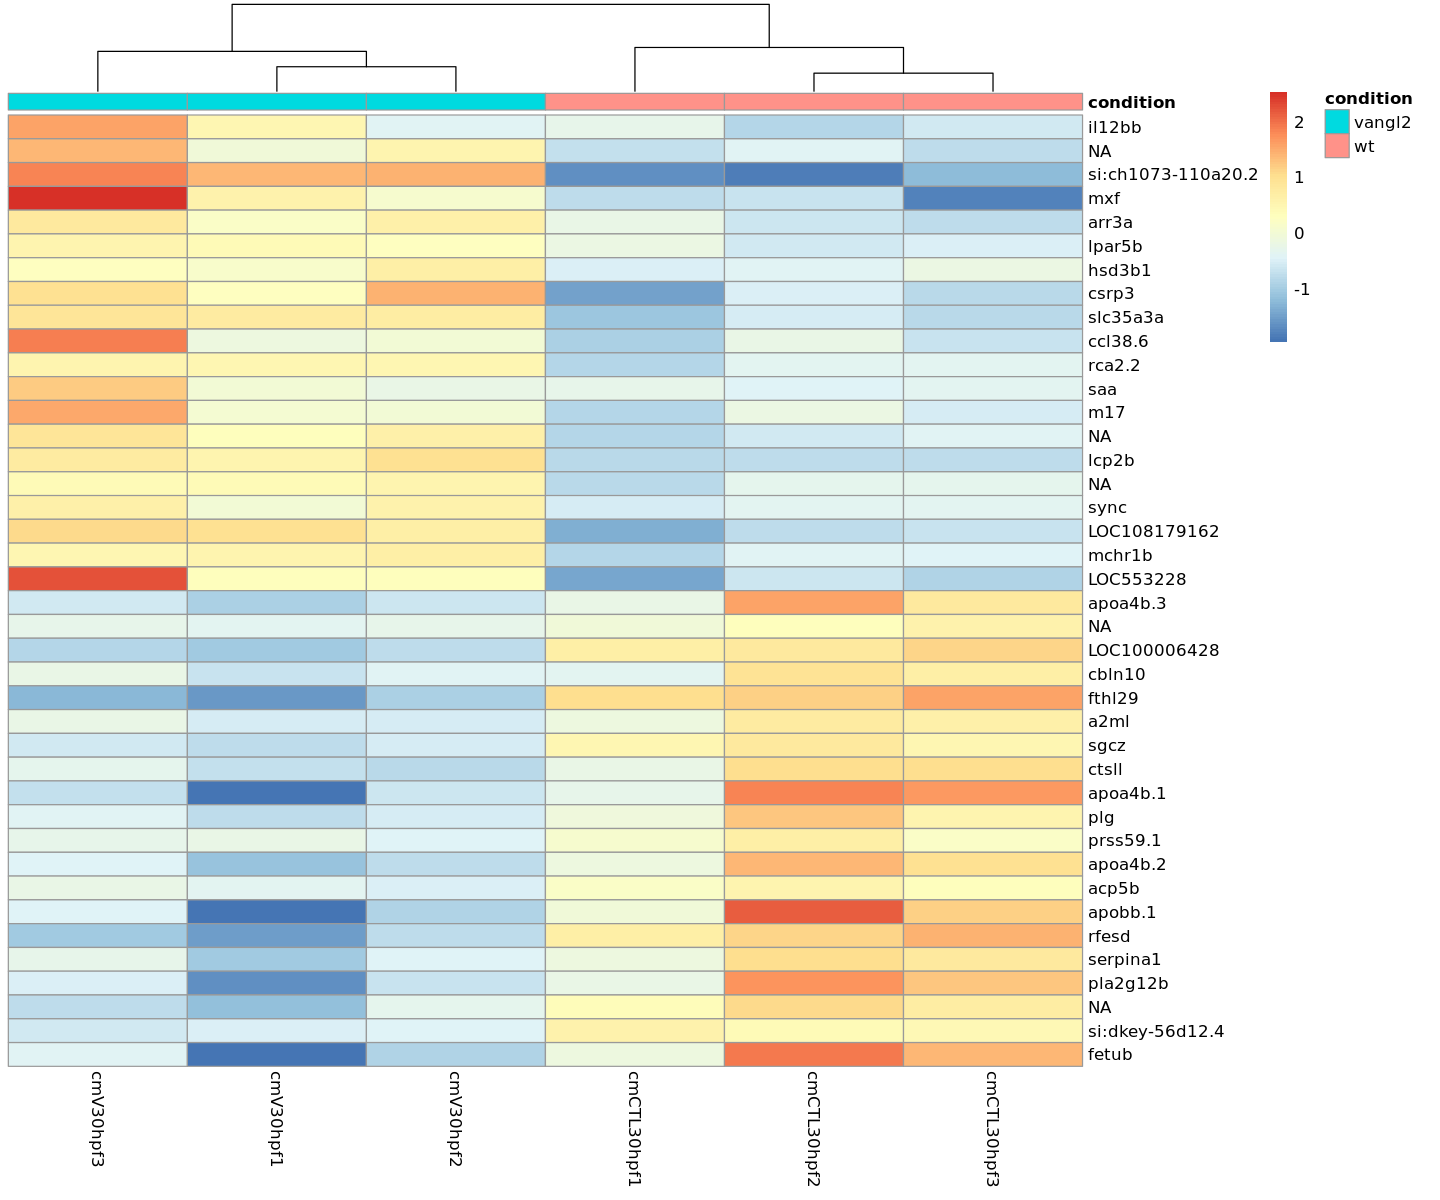

In [66]:
pretty_heatmap<-function(topBotDEGenes, samples, filename){
    mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(samples)])
    mat  <- mat - rowMeans(mat)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    labels_row = c(topBotDEGenes$symbol)
    #pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = filename)
    pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
}

pretty_heatmap(topBotDEGenes_vangl2,vangl2wt_samples, "deseq2_macrogenonly_outputs/topbot20heatmap_vangl2_wt.pdf")



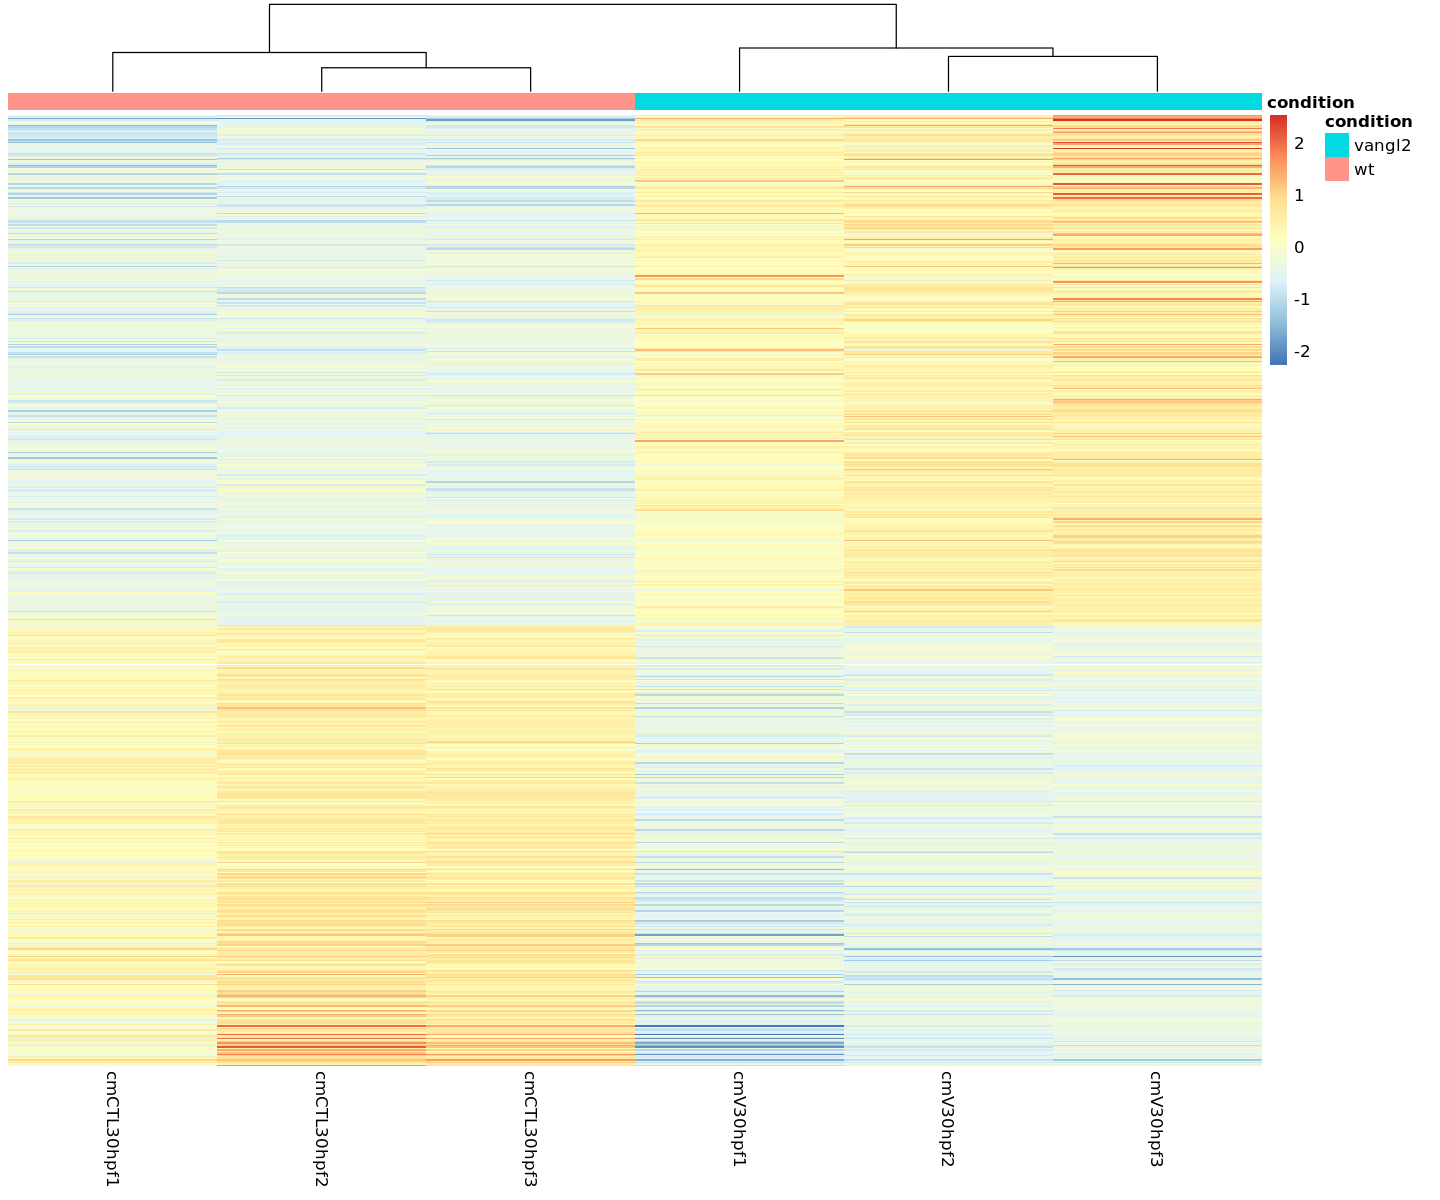

In [67]:
allDEGenes_vangl2<-resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ]

pretty_heatmap_all<-function(allDEGenes, samples, filename){
    matall<-(assay(vsd)[rownames(allDEGenes), rownames(samples)])
    matall  <- matall - rowMeans(matall)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE)
    #pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE, filename = filename)
}

pretty_heatmap_all(allDEGenes_vangl2, vangl2wt_samples, "deseq2_macrogenonly_outputs/allDEpadj0.05_heatmap_vangl2_wt.pdf")

Warning message:
“Removed 20037 rows containing missing values (geom_text).”


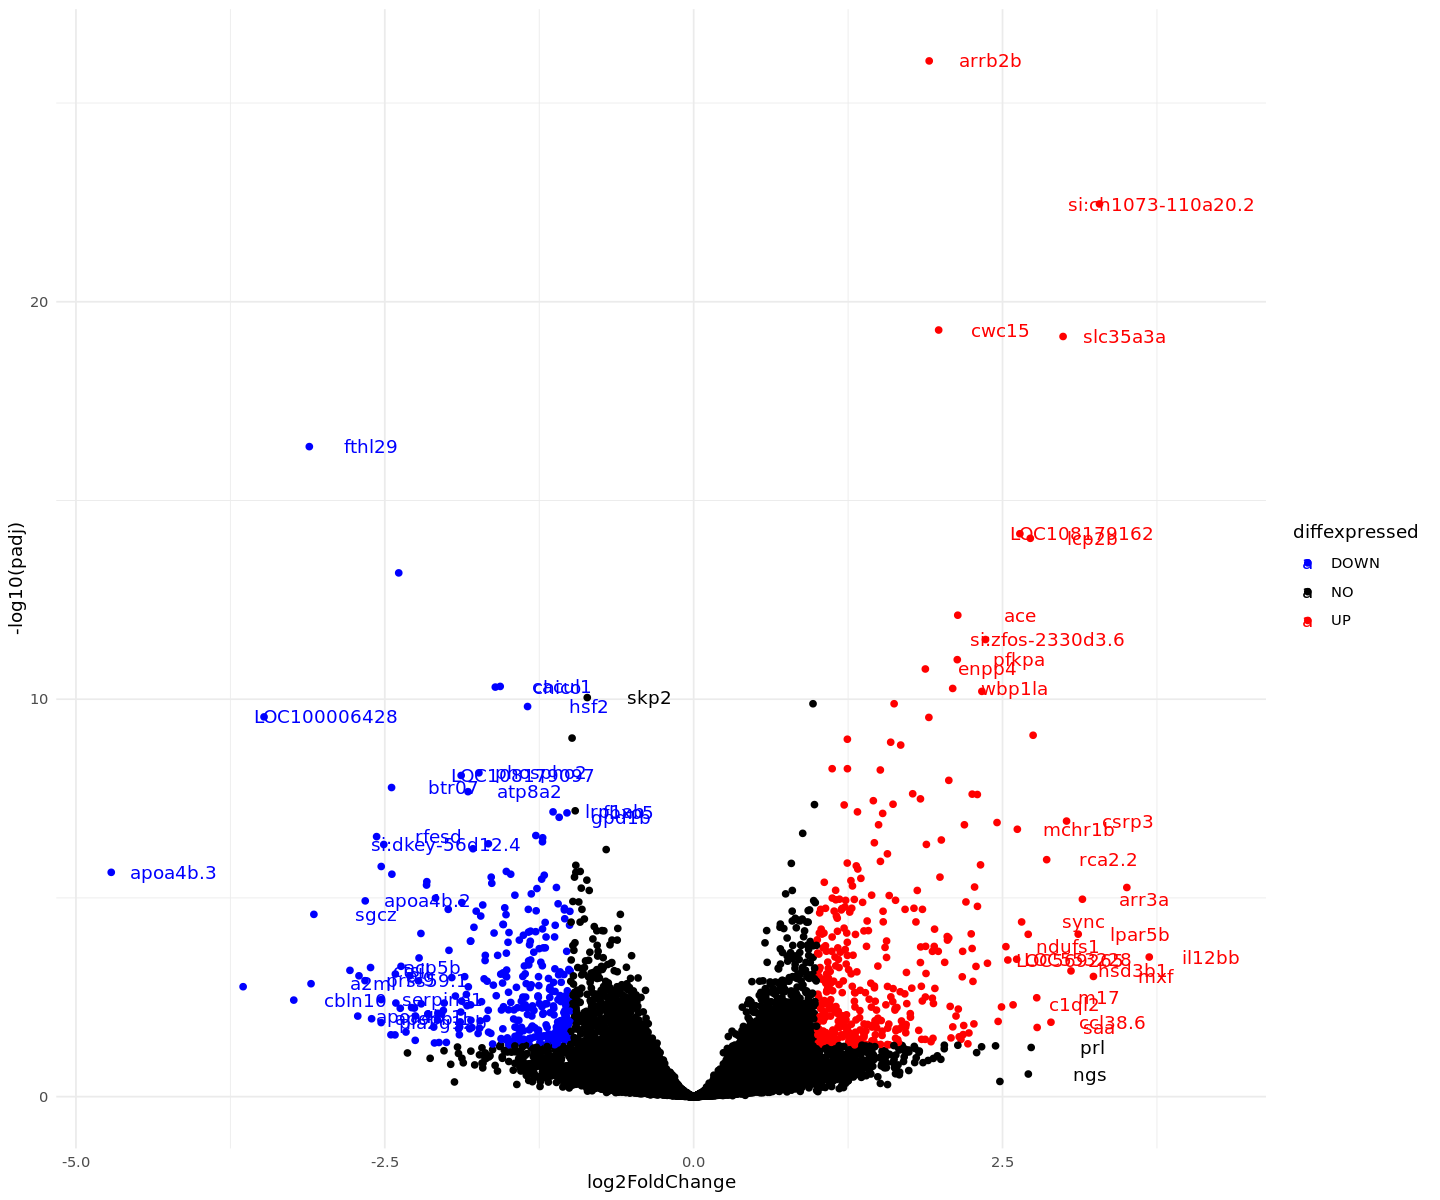

Saving 6.67 x 6.67 in image

Warning message:
“Removed 20037 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 20037 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image



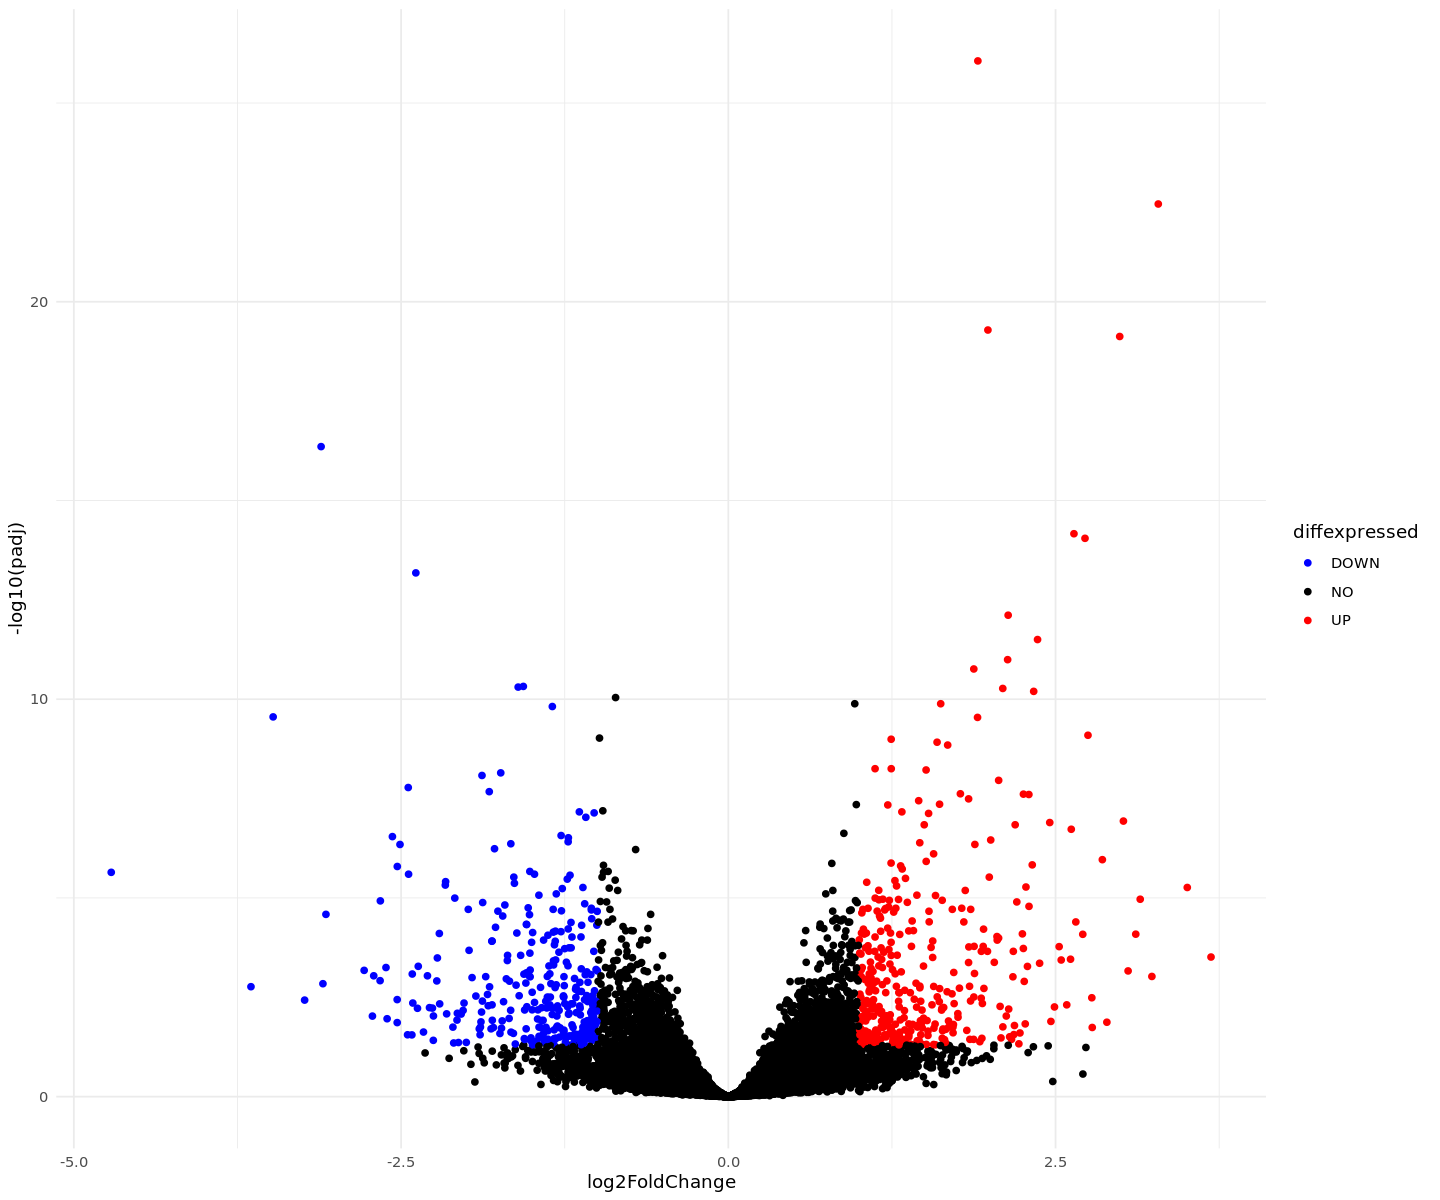

In [68]:
## volcano plot
de_vangl2<-data.frame(subset(res_vangl2, padj != 0))
de_vangl2$delabel <- NA
de_vangl2$symbol <- as.factor(de_vangl2$symbol)
# add a column of NAs
de_vangl2$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de_vangl2$diffexpressed[de_vangl2$log2FoldChange > 1 & de_vangl2$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de_vangl2$diffexpressed[de_vangl2$log2FoldChange < -1 & de_vangl2$padj < 0.05] <- "DOWN"
#de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
#de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <-"UP"
de_vangl2$delabel[de_vangl2$log2FoldChange > 2.5 | -log10(de_vangl2$padj) > 10] <- as.character(de_vangl2$symbol[de_vangl2$log2FoldChange > 2.5 | -log10(de_vangl2$padj) > 10])
de_vangl2$delabel[(de_vangl2$log2FoldChange < -2.5) | (de_vangl2$log2FoldChange < -1 & -log10(de_vangl2$padj) > 7)] <- as.character(de_vangl2$symbol[(de_vangl2$log2FoldChange < -2.5) | (de_vangl2$log2FoldChange < -1 & -log10(de_vangl2$padj) > 7)])
plot<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed, label=delabel)) + 
    geom_point() + 
    theme_minimal() +
    geom_text(nudge_x = 0.5) +
scale_color_manual(values=c("blue", "black", "red"))
plot
plot2<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + 
    geom_point() + 
    theme_minimal() +
scale_color_manual(values=c("blue", "black", "red"))
plot2
ggsave(filename = "deseq2_macrogenonly_outputs/volcanoallDEFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_nolab_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot2)

In [49]:
### write results table

In [46]:
resSigOrdered_vangl2 <- resSig_vangl2[order(-resSig_vangl2$log2FoldChange),]
resSigOrderedDF_vangl2 <- as.data.frame(resSigOrdered_vangl2)
head(resSigOrderedDF_vangl2)
dim(resSigOrderedDF_vangl2)
write.csv(resSigOrderedDF_vangl2, file = "deseq2_macrogenonly_outputs/resultsDElogfc1padj0.05_vangl2_wt.csv")
write.csv(resSigOrderedDF_vangl2, file = "macrogen_and_celseq_analysis_200731/macrogen_resultsDElogfc1padj0.05_vangl2_wt.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000054542,39.65349,3.687578,0.8034224,4.589837,4.435918e-06,3.073632e-04,il12bb,335994
ENSDARG00000105494,42.65196,3.506214,0.6303729,5.562128,2.665054e-08,5.464449e-06,NA,NA
ENSDARG00000092806,3433.57488,3.284702,0.3041479,10.799684,3.453893e-27,3.470126e-23,si:ch1073-110a20.2,100538070
ENSDARG00000026049,377.54850,3.235877,0.7553580,4.283899,1.836466e-05,9.468512e-04,mxf,561067
ENSDARG00000056511,45.37124,3.146710,0.5809294,5.416682,6.071530e-08,1.079658e-05,arr3a,436678
ENSDARG00000068638,21.53797,3.112620,0.6323139,4.922586,8.540798e-07,8.172324e-05,lpar5b,798233


[1] 670   8

## volcano plot overlaying second expt

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



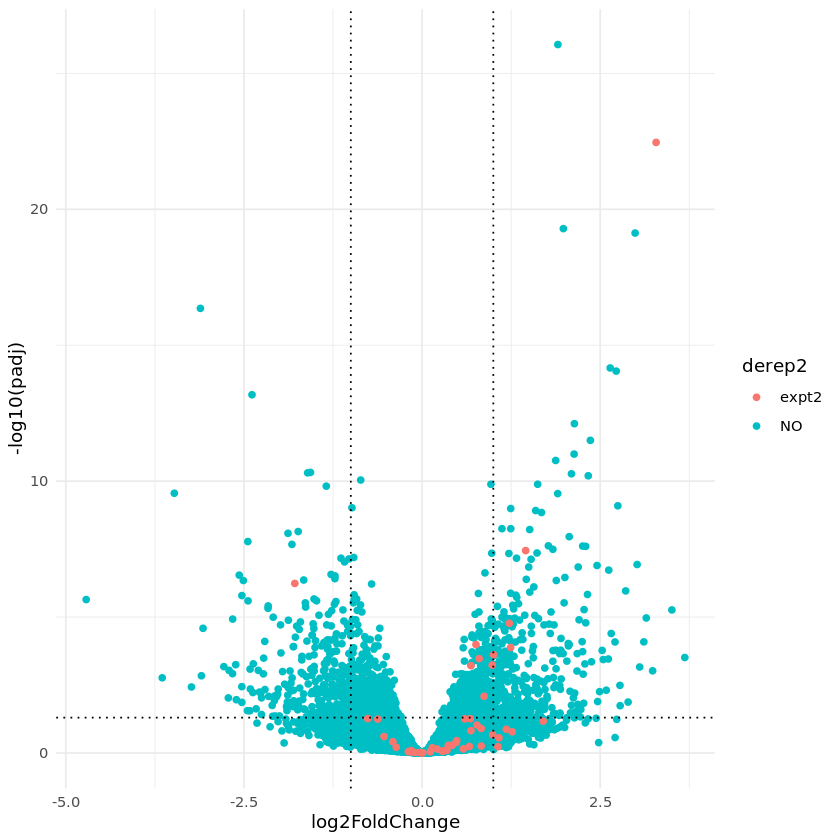

In [49]:
res_vangl_expt2<-read.csv("deseq2_trimmed_outputs/resultsDElogFC1padj0.05_vangl2_wt.csv", row.names=1)
de_vangl2$derep2 <- "NO"

de_vangl2$derep2[rownames(de_vangl2) %in% rownames(res_vangl_expt2)] <- "expt2"
de_vangl2 <- de_vangl2[order(-as.numeric(factor(de_vangl2$derep2))),]
plotoverlap<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=derep2)) + 
    geom_point() + 
    theme_minimal()+
    geom_vline(xintercept=c(-1, 1), col="black", linetype="dotted") +
    geom_hline(yintercept=-log10(0.05), col="black",linetype="dotted")
plotoverlap
ggsave(filename = "deseq2_macrogenonly_outputs/volcanoallDEFC1padj0.05_vangl2_wt_expt2overlap.pdf", plot=plotoverlap)
ggsave(filename = "macrogen_and_celseq_analysis_200731/macrogen_volcanoallDElogFC1padj0.05_vangl2_wt_expt2overlap.pdf", plot=plotoverlap)


In [99]:
desig_vangl=de_vangl2[de_vangl2$diffexpressed=="UP"| de_vangl2$diffexpressed=="DOWN",]
dim(desig)
q=nrow(desig[rownames(desig_vangl) %in% rownames(res_vangl_expt2),])
q
k=length(de_vangl2$diffexpressed[de_vangl2$diffexpressed=="UP"| de_vangl2$diffexpressed=="DOWN"])
k
m=length(rownames(res_vangl_expt2))
m
n=nrow(de_vangl2)-nrow(res_vangl_expt2)
n
#hyper genometric test
phyper(q=q, m=m, n=n, k=k, lower.tail=FALSE)

[1] 670  11

[1] 6

[1] 670

[1] 48

[1] 20046

[1] 0.0009953557

## Compare intersection between DE genes from bleb and from vangl2

In [95]:
DEvangl2<-rownames(resSigOrderedDF_vangl2)
# get entrez ids exluding NAs
# do intersect
DEblebb<-rownames(resSigOrderedDF)
length(DEvangl2)
length(DEblebb)


[1] 670

[1] 1656

In [96]:
length(intersect(DEvangl2,DEblebb))

[1] 88

In [ ]:
Intersect is a little higher than the intersect that Anne obtained from macrogen, but vangl2 is not downregulated.
Tried normalising data separately but that didnt help. Possible that this is not actually the same data that macrogen gave - the samples names are cmVangl2 rather than just Vangl? Need to check with her.

In [ ]:
## GO enrichment (work in progress)

In [54]:
library(topGO)
#?topGO:new()

In [55]:
#make gene universe - all detected genes
geneList<-row.names(assay(vsd))

# make gene sel - topDE up or down genes
topBlebGenes<-row.names(resSigOrdered[resSigOrdered$log2FoldChange > 0,])

In [44]:
#dim(resSigOrdered[resSigOrdered$log2FoldChange > 0,])
?new

In [43]:
# working on it - need to sort annotation
goParams <- new("GOHyperGParams",
                geneIds = topBlebGenes,
                universeGeneIds = geneList,
                annotation ="org.Dr.eg.db" ,
                ontology = "MF",
                pvalueCutoff = 0.01,
                conditional = TRUE,
                testDirection = "over")
goResults <- hyperGTest(goParams)

ERROR: Error in getUniverseHelper(probes, datPkg, entrezIds): After filtering, there are no valid IDs that can be used as the Gene universe.
  Check input values to confirm they are the same type as the central ID used by your annotation package.
  For chip packages, this will still mean the central GENE identifier used by the package (NOT the probe IDs).


## save workspace

In [ ]:
save.image(file = "DESeq2_trimmed_macrogen_data_alone.RData")